In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [24]:
df = pd.read_csv('manufacturing_data.csv')

In [25]:
df['recordDate'] = pd.to_datetime(df['recordDate'], errors='coerce')

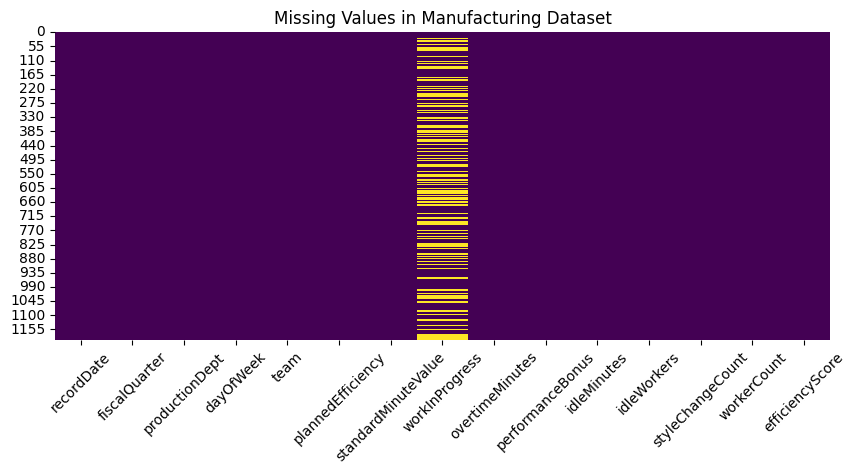

In [26]:
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Manufacturing Dataset')
plt.xticks(rotation=45)
plt.show()

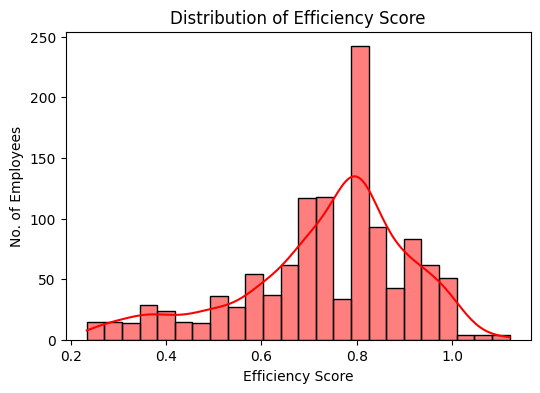

In [27]:
plt.figure(figsize=(6, 4))
sns.histplot(df['efficiencyScore'], kde=True, color='red')
plt.title('Distribution of Efficiency Score')
plt.xlabel('Efficiency Score')
plt.ylabel('No. of Employees')
plt.show()

/tmp/ipython-input-2204487872.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='productionDept', y='efficiencyScore', data=dept, palette='viridis',color='orange')


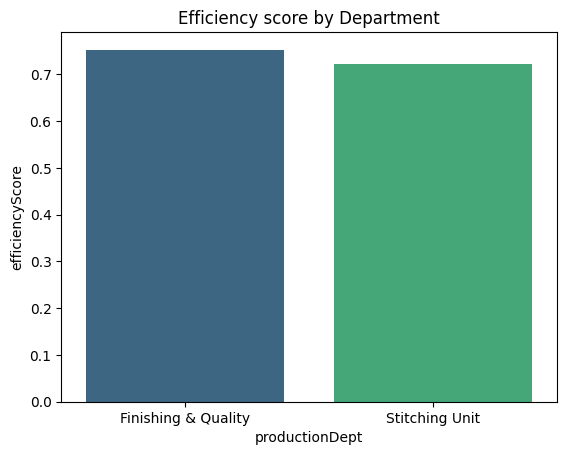

In [28]:
# Distribution of frequency as per departments
df['productionDept'] = df['productionDept'].str.strip()
dept= df.groupby('productionDept')['efficiencyScore'].mean().reset_index()


sns.barplot(x='productionDept', y='efficiencyScore', data=dept, palette='viridis',color='orange')
plt.title('Efficiency score by Department')
plt.show()


/tmp/ipython-input-1022336194.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='fiscalQuarter', y='efficiencyScore', data=df, estimator=pd.Series.mean, ci=None, order=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])


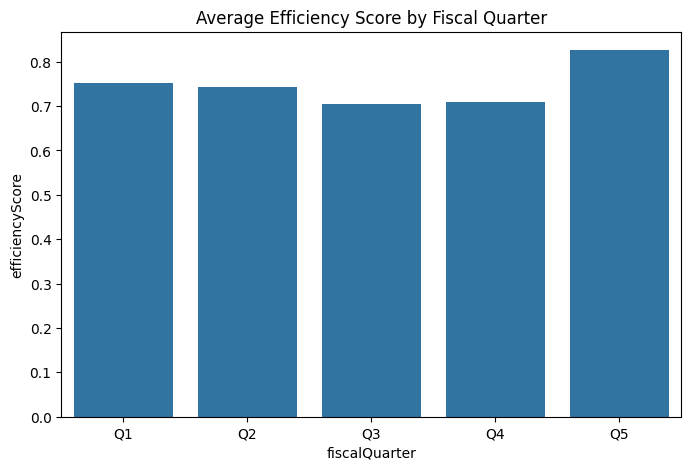

In [29]:
# Sessional trend in efficiency score
plt.figure(figsize=(8, 5))
sns.barplot(x='fiscalQuarter', y='efficiencyScore', data=df, estimator=pd.Series.mean, ci=None, order=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
plt.title('Average Efficiency Score by Fiscal Quarter')
plt.show()

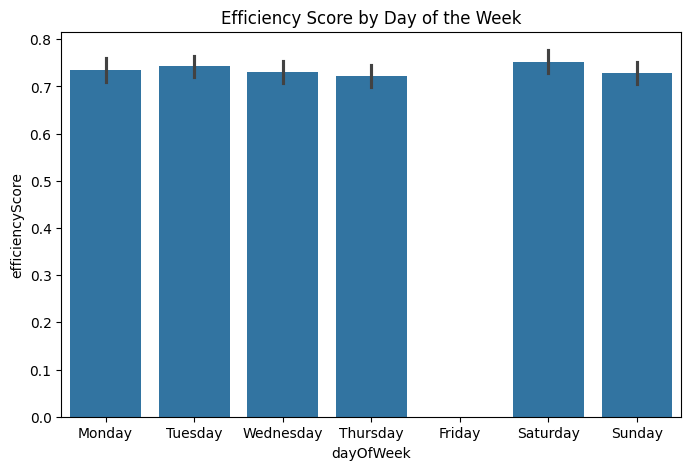

In [30]:
# Sessional trend in efficiency score
Days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(8, 5))
sns.barplot(x='dayOfWeek', y='efficiencyScore', data = df, order = Days)
plt.title('Efficiency Score by Day of the Week')
plt.show()

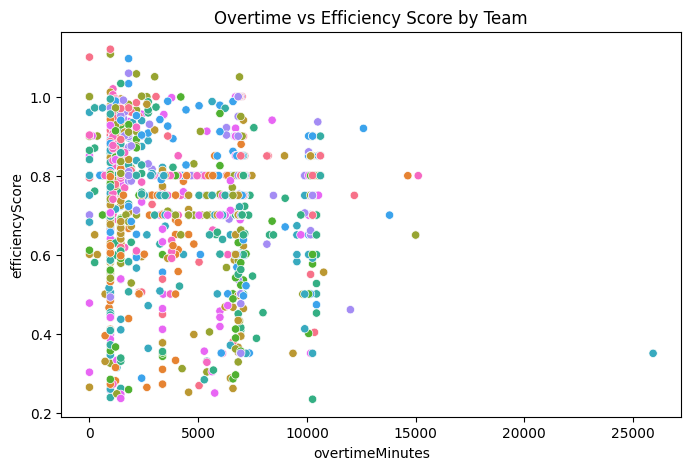

In [31]:
# Overtime vs Efficiency Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='overtimeMinutes', y='efficiencyScore', hue='team', data=df, legend=False)
plt.title('Overtime vs Efficiency Score by Team')
plt.show()

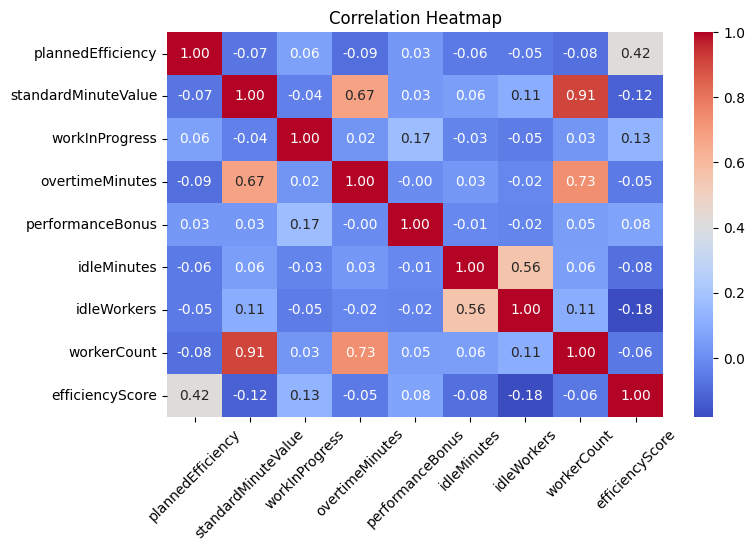

In [32]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()

In [33]:
print(df.corr(numeric_only=True).head())


                     plannedEfficiency  standardMinuteValue  workInProgress  \
plannedEfficiency             1.000000            -0.069489        0.062054   
standardMinuteValue          -0.069489             1.000000       -0.037837   
workInProgress                0.062054            -0.037837        1.000000   
overtimeMinutes              -0.088557             0.674887        0.022302   
performanceBonus              0.032768             0.032629        0.167210   

                     overtimeMinutes  performanceBonus  idleMinutes  \
plannedEfficiency          -0.088557          0.032768    -0.056181   
standardMinuteValue         0.674887          0.032629     0.056863   
workInProgress              0.022302          0.167210    -0.026299   
overtimeMinutes             1.000000         -0.004793     0.031038   
performanceBonus           -0.004793          1.000000    -0.012024   

                     idleWorkers  workerCount  efficiencyScore  
plannedEfficiency      -0.053818 